# Repeat Buyers Prediction - Part 2
## Model Building & Comparision

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets, metrics, model_selection


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

import joblib #save model

### Import Training Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_data_w_features.csv',index_col=0)

In [4]:
Y = df_train['label']
X = df_train.drop(['user_id','merchant_id','label'],axis = 1)
X.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,is_db11,not_db11,db11_days,non_db11_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,6.0,0.0,39,20,6,9,1,8,4,5,36,0,1,2
1,6.0,0.0,14,1,1,3,1,2,3,0,13,0,1,0
2,6.0,0.0,18,2,1,2,1,1,2,0,12,0,6,0
3,6.0,0.0,2,1,1,1,1,0,1,0,1,0,1,0
4,-1.0,0.0,8,1,1,3,1,2,3,0,7,0,1,0
5,4.0,1.0,1,1,1,1,1,0,1,0,0,0,1,0
6,5.0,0.0,3,2,1,1,1,0,1,0,2,0,1,0
7,5.0,0.0,83,48,15,3,1,2,3,0,78,0,5,0
8,5.0,0.0,7,4,1,1,1,0,1,0,6,0,1,0
9,4.0,1.0,4,1,1,2,1,1,2,0,2,0,1,1


In [5]:
Y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [6]:
Y.value_counts()

0    244912
1     15952
Name: label, dtype: int64

### Oversampling with SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
oversample = SMOTE()
smX, smY = oversample.fit_resample(X, Y)

In [9]:
from collections import Counter
# summarize the new class distribution
counter = Counter(smY)
print(counter)

Counter({0: 244912, 1: 244912})


In [10]:
X_train, X_test, y_train, y_test = train_test_split(smX,smY, test_size = 0.25,random_state = 10)

### Model Building

#### Logistic Regression

In [11]:
Logit = LogisticRegression(solver='liblinear')
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)
Predict_proba = Logit.predict_proba(X_test)
print(Predict[0:20])
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
Score

[1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
[[1.15653495e-03 9.98843465e-01]
 [5.60958794e-01 4.39041206e-01]
 [6.55851915e-01 3.44148085e-01]
 ...
 [2.04540466e-06 9.99997955e-01]
 [6.52114058e-01 3.47885942e-01]
 [5.52407617e-01 4.47592383e-01]]


0.624771346442804

#### KNN

In [12]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.23


#### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0) 
tree.fit(X_train, y_train)
Predict_proba = tree.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

[[0.39766458 0.60233542]
 [0.39766458 0.60233542]
 [0.53658443 0.46341557]
 ...
 [0.53658443 0.46341557]
 [0.66523978 0.33476022]
 [0.78858242 0.21141758]]
Accuracy on training set: 0.619
Accuracy on test set: 0.620


In [14]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.0250863  0.87494125 0.         0.08317475 0.00190841 0.
 0.         0.         0.00796432 0.         0.         0.00377448
 0.         0.00315049]


<BarContainer object of 14 artists>

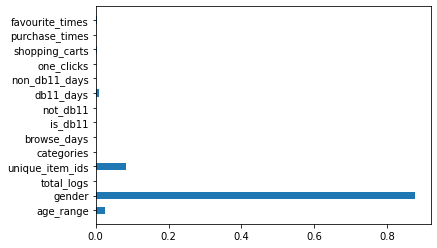

In [15]:
plt.barh(X.columns.tolist(),height=0.5,width=tree.feature_importances_,align="center")

#### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=13, random_state=2) 
forest.fit(X_train, y_train)
Predict_proba = forest.predict_proba(X_test)
y_pred_test = forest.predict(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
print("Accuracy Score: {:.3f}".format(accuracy_score(y_test, y_pred_test)))

[[0.07692308 0.92307692]
 [0.         1.        ]
 [0.84615385 0.15384615]
 ...
 [0.         1.        ]
 [0.84615385 0.15384615]
 [0.88846154 0.11153846]]
Accuracy on training set: 0.818
Accuracy on test set: 0.793
Accuracy Score: 0.793


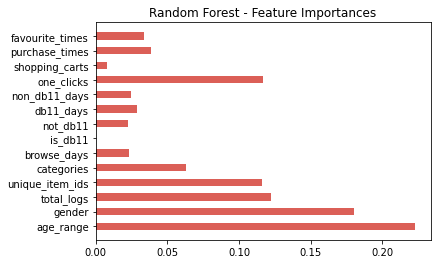

In [17]:
sns.set_palette("hls")
plt.barh(X.columns.tolist(),height=0.5,width=forest.feature_importances_,align="center")
plt.title("Random Forest - Feature Importances")
plt.show()

In [18]:
# Classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81     61154
           1       0.86      0.70      0.77     61302

    accuracy                           0.79    122456
   macro avg       0.80      0.79      0.79    122456
weighted avg       0.80      0.79      0.79    122456



In [19]:
# # save
# joblib.dump(forest, "./random_forest.joblib")

#### Gradient Boosted Decision Trees

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train)
Predict_proba = gbrt.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

[[0.09289204 0.90710796]
 [0.07491875 0.92508125]
 [0.65769537 0.34230463]
 ...
 [0.4301248  0.5698752 ]
 [0.77253754 0.22746246]
 [0.80432423 0.19567577]]
Accuracy on training set: 0.702
Accuracy on test set: 0.704


<BarContainer object of 14 artists>

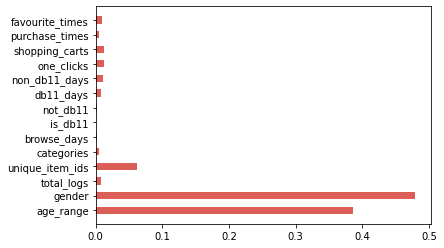

In [21]:
plt.barh(X.columns.tolist(),height=0.5,width=gbrt.feature_importances_,align="center")

#### XGBoost

In [22]:
import xgboost
xgmodel = xgboost.XGBClassifier()

# Fit the model using the training data
xgmodel.fit(X_train, y_train)

y_pred = xgmodel.predict(X_test)
Predict_proba = gbrt.predict_proba(X_test)
print(Predict_proba)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred)))

[[0.09289204 0.90710796]
 [0.07491875 0.92508125]
 [0.65769537 0.34230463]
 ...
 [0.4301248  0.5698752 ]
 [0.77253754 0.22746246]
 [0.80432423 0.19567577]]
Accuracy on test set: 0.706


<BarContainer object of 14 artists>

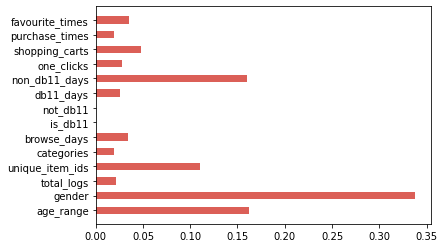

In [23]:
plt.barh(X.columns.tolist(),height=0.5,width=xgmodel.feature_importances_,align="center")

In [24]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.76     61154
           1       0.91      0.46      0.61     61302

    accuracy                           0.71    122456
   macro avg       0.77      0.71      0.69    122456
weighted avg       0.77      0.71      0.69    122456



#### MLP Classifier

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=0.1,random_state=0,hidden_layer_sizes=[10,10],max_iter = 400).fit(X_train, y_train)
Predict = mlp.predict(X_test)
Predict_proba = mlp.predict_proba(X_test)
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
print(Score)

[[2.08021667e-05 9.99979198e-01]
 [5.61347564e-01 4.38652436e-01]
 [6.55546787e-01 3.44453213e-01]
 ...
 [1.11027965e-09 9.99999999e-01]
 [6.50209266e-01 3.49790734e-01]
 [5.50823763e-01 4.49176237e-01]]
0.6248448422290456


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


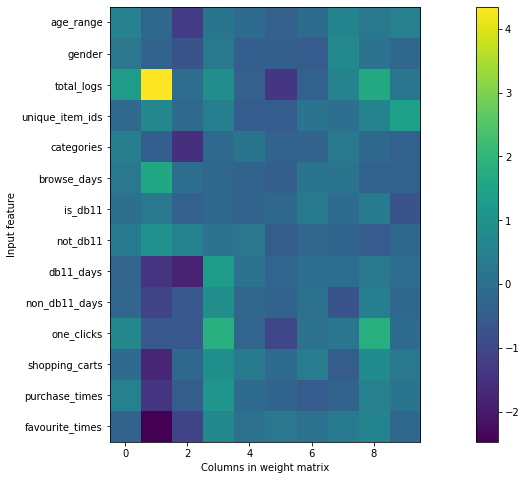

In [26]:
plt.figure(figsize=(20, 8))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(14), X.columns.tolist()) 
plt.xlabel("Columns in weight matrix") 
plt.ylabel("Input feature") 
plt.colorbar()

In [27]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train = X_train[X_train.columns.tolist()].astype(float)
X_test = X_test[X_test.columns.tolist()].astype(float)

In [29]:
scaler.fit(X_train)

StandardScaler()

In [30]:
# Transform Data
X_train_scaled = scaler.transform(X_train)

In [31]:
X_test_scaled = scaler.transform(X_test)

In [32]:
mlp1 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[13],max_iter=1000).fit(X_train_scaled, y_train)
Predict = mlp1.predict(X_test_scaled)
Score = accuracy_score(y_test, Predict)
print(Score)

0.6729029202325734


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [33]:
mlp1 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[14]).fit(X_train_scaled, y_train)
Predict = mlp1.predict(X_test_scaled)
Score = accuracy_score(y_test, Predict)
print(Score)

0.6707878748285099


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Model Implementation

In [34]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_test_w_features.csv',index_col=0)

In [35]:
X1 = df_test.drop(['user_id','merchant_id','prob'],axis = 1)

In [36]:
X1.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,is_db11,not_db11,db11_days,non_db11_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,-1.0,0.0,2,1,1,1,1,0,1,0,1,0,1,0
1,2.0,-1.0,10,9,4,1,1,0,1,0,5,0,5,0
2,6.0,0.0,6,1,1,1,1,0,1,0,5,0,1,0
3,6.0,0.0,11,1,1,1,1,0,1,0,10,0,1,0
4,2.0,1.0,50,8,4,5,1,4,5,0,47,0,1,2
5,2.0,0.0,11,2,1,4,1,3,3,1,9,0,1,1
6,5.0,1.0,13,6,1,1,1,0,1,0,11,0,2,0
7,3.0,1.0,2,1,1,1,1,0,1,0,1,0,1,0
8,3.0,1.0,3,2,1,1,1,0,1,0,2,0,1,0
9,3.0,1.0,7,4,3,1,1,0,1,0,6,0,1,0


In [37]:
ForestPredict = forest.predict(X1)

In [38]:
ForestPredict[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [39]:
df_test["Forest_prob"] = ForestPredict[:]

In [40]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,is_db11,not_db11,db11_days,non_db11_days,one_clicks,shopping_carts,purchase_times,favourite_times,Forest_prob
0,163968,4605,NaN,-1.0,0.0,2,1,1,1,1,0,1,0,1,0,1,0,0
1,360576,1581,NaN,2.0,-1.0,10,9,4,1,1,0,1,0,5,0,5,0,0
2,98688,1964,NaN,6.0,0.0,6,1,1,1,1,0,1,0,5,0,1,0,0
3,98688,3645,NaN,6.0,0.0,11,1,1,1,1,0,1,0,10,0,1,0,0
4,295296,3361,NaN,2.0,1.0,50,8,4,5,1,4,5,0,47,0,1,2,1
5,33408,98,NaN,2.0,0.0,11,2,1,4,1,3,3,1,9,0,1,1,0
6,230016,1742,NaN,5.0,1.0,13,6,1,1,1,0,1,0,11,0,2,0,0
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,1,0,1,0,0
8,164736,1963,NaN,3.0,1.0,3,2,1,1,1,0,1,0,2,0,1,0,0
9,164736,2634,NaN,3.0,1.0,7,4,3,1,1,0,1,0,6,0,1,0,0


In [41]:
buyerpredict = df_test[["user_id", "merchant_id","Forest_prob"]]
buyerpredict.head()

,user_id,merchant_id,Forest_prob
0,163968,4605,0
1,360576,1581,0
2,98688,1964,0
3,98688,3645,0
4,295296,3361,1


In [44]:
buyerpredict.rename(columns={"user_id":"User ID","merchant_id":"Merchant ID", "Forest_prob":"Classification"},inplace=True)
buyerpredict.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,User ID,Merchant ID,Classification
0,163968,4605,0
1,360576,1581,0
2,98688,1964,0
3,98688,3645,0
4,295296,3361,1
5,33408,98,0
6,230016,1742,0
7,164736,598,0
8,164736,1963,0
9,164736,2634,0


In [45]:
buyerpredict["Classification"] = np.where((buyerpredict["Classification"] == 1),
                                       "Repeat Buyer", "Non-Repeat Buyer")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
buyerpredict.head()

,User ID,Merchant ID,Classification
0,163968,4605,Non-Repeat Buyer
1,360576,1581,Non-Repeat Buyer
2,98688,1964,Non-Repeat Buyer
3,98688,3645,Non-Repeat Buyer
4,295296,3361,Repeat Buyer


In [47]:
buyerpredict.to_csv("./buyerpredict.csv", index=False)